In [1]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
dataset= r'data14 12.7.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [3]:
data

,a1,a2,a3,a4,a1_coefficients,a2_coefficients,a3_coefficient,a4_coefficients,b1,b2,...,Perovskite_deposition_thermal_annealing_temperature8,Perovskite_deposition_thermal_annealing_time1,Perovskite_deposition_thermal_annealing_time2,Perovskite_deposition_thermal_annealing_time3,Perovskite_deposition_thermal_annealing_time4,Perovskite_deposition_thermal_annealing_time5,Perovskite_deposition_thermal_annealing_time6,Perovskite_deposition_thermal_annealing_time7,Perovskite_deposition_thermal_annealing_time8,JV_default_PCE
0,167.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,118.71,0.0,...,0,10.0,0.0,0,0,0,0,0,0,0
1,167.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,118.71,0.0,...,0,10.0,0.0,0,0,0,0,0,0,0
2,167.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,118.71,0.0,...,0,10.0,0.0,0,0,0,0,0,0,0
3,167.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,118.71,0.0,...,0,10.0,0.0,0,0,0,0,0,0,0
4,167.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,118.71,0.0,...,0,10.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,217.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,107.87,207.2,...,0,60.0,0.0,0,0,0,0,0,0,0
6430,217.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,107.87,207.2,...,0,60.0,0.0,0,0,0,0,0,0,0
6431,217.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,107.87,207.2,...,0,60.0,0.0,0,0,0,0,0,0,0
6432,217.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,107.87,207.2,...,0,60.0,0.0,0,0,0,0,0,0,0


In [4]:
X = data.values[:, :-1]
y = data.values[:, -1]

In [5]:
def feature_rfe_select1(remain_number):
    # 使用随机森林的rfe:RandomForestRegressor()
    from sklearn import preprocessing
    from sklearn.feature_selection import RFE, RFECV
    from sklearn.ensemble import RandomForestRegressor
    import csv
    import numpy as np

    # # 输入数据归一化
    # X = data.values[:, :-1]
    # for i in range(X.shape[1]):
    #     X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
    # y = data.values[:, -1]  # 目标数值

    # rfe步骤
    model = RandomForestRegressor()
    rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
    rfe_X = rfe.fit_transform(X, y)
    print("特征是否被选中：\n", rfe.support_)                                          # ndarray
    print("获取的数据特征尺寸:", rfe_X.shape)                                           # tuple
    list1 = rfe.support_.tolist()

    # 打印rfe后的特征，但可能包含空值
    import pandas as pd
    Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
    Features_0
    Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
    Features_rfe
    #     pd.options.display.max_rows=None
    p = pd.concat([Features_0, Features_rfe], axis=1)
    q = p[p['whether selected']>0]
    r = q.reset_index(drop=True)
    global s_rfe
    s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
    global target
    target = pd.DataFrame(data=data.iloc[:,-1])
    # target = pd.DataFrame(data, columns=['Potential (v)'])
    global data_rfe
    data_rfe = pd.concat([s_rfe,target], axis=1)
    print("最后的特征s_rfe:", r.Features.values)                                        # ndarray
    print("目标target:", target)
    print("rfe后的总数据data_rfe:", data_rfe)

    list2 = r.Features.values.tolist()

    # print全输出
    with open("data.txt", "w") as f:
        f.write("特征是否被选中：\n")
        for i in range(len(list1)):
            f.write(str(list1[i])+' ')
        f.write("\n获取的数据特征尺寸：\n")
        f.write('(%s,%s)' % rfe_X.shape)
        f.write("\n最后的特征s_rfe：\n")
        for i in range(len(list2)):
            f.write(str(list2[i]) + '\n')
    target.to_csv("target.csv")
    data_rfe.to_csv("data_rfe.csv")


In [6]:
feature_rfe_select1(23)

特征是否被选中：
 [ True  True False False  True  True  True False False False False False
 False False False False False  True  True False  True  True  True  True
  True False  True  True  True False  True  True  True  True False  True
  True False False False False False False  True  True False False False
 False False False]
获取的数据特征尺寸: (6434, 23)
最后的特征s_rfe: ['a1' 'a2' 'a1_coefficients' 'a2_coefficients' 'a3_coefficient'
 'c1_coefficients' 'c2_coefficients' 'ETL_stack_sequence1'
 'ETL_stack_sequence2' 'ETL_stack_sequence3' 'ETL_thickness1'
 'ETL_thickness2' 'HTL_additives_compounds1' 'HTL_additives_compounds2'
 'HTL_additives_compounds3' 'Perovskite_deposition_solvents1'
 'Perovskite_deposition_solvents2' 'Perovskite_deposition_solvents3'
 'HTL_stack_sequence1'
 'Perovskite_deposition_thermal_annealing_temperature1'
 'Perovskite_deposition_thermal_annealing_temperature2'
 'Perovskite_deposition_thermal_annealing_time1'
 'Perovskite_deposition_thermal_annealing_time2']
目标target:       JV_def

In [7]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
clf = RandomForestClassifier()

In [9]:
clf.fit(X,y)

RandomForestClassifier()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.11030008e-04
 8.11030008e-04 8.11030008e-04 3.24412003e-03 4.05515004e-03
 4.05515004e-03 4.86618005e-03 5.67721006e-03 5.67721006e-03
 7.29927007e-03 8.11030008e-03 8.11030008e-03 8.92133009e-03
 1.05433901e-02 1.13544201e-02 1.13544201e-02 1.29764801e-02
 1.29764801e-02 1.45985401e-02 1.45985401e-02 1.54095702e-02
 1.78426602e-02 1.86536902e-02 1.94647202e-02 2.10867802e-02
 2.27088402e-02 2.35198702e-02 2.43309002e-02 2.59529603e-02
 2.83860503e-02 2.91970803e-02 3.00081103e-02 3.08191403e-02
 3.16301703e-02 3.32522303e-02 3.40632603e-02 3.64963504e-02
 3.81184104e-02 4.05515004e-02 4.13625304e-02 4.29845904e-02
 4.37956204e-02 4.62287105e-02 4.86618005e-02 5.02838605e-02
 5.10948905e-02 5.19059205e-02 5.35279805e-02 5.67721006e-02
 5.75831306e-02 5.92051906e-02 6.16382806e-02 6.40713706e-02
 6.65044607e-02 6.81265207e-02 6.97485807e-02 7.29927007e-02
 7.54257908e-02 7.704785

<Figure size 432x288 with 0 Axes>

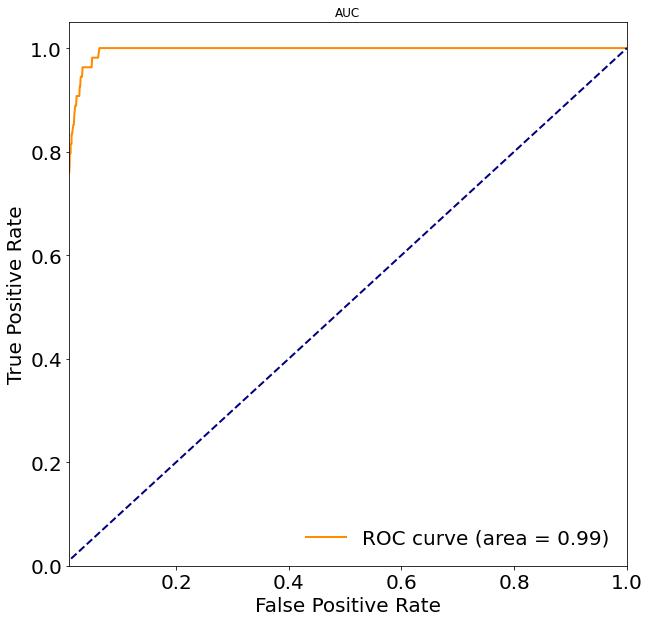

In [10]:
#画出ROC曲线 RandomForest test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

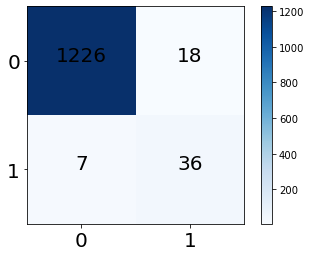

true: 1262


In [11]:
#画出混淆矩阵 RandomForest test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.02142713e-04 4.04285426e-04 6.06428138e-04 6.06428138e-04
 8.08570851e-04 8.08570851e-04 1.01071356e-03 1.01071356e-03
 1.41499899e-03 1.61714170e-03 1.61714170e-03 1.81928441e-03
 1.81928441e-03 2.02142713e-03 2.02142713e-03 2.22356984e-03
 2.22356984e-03 2.22356984e-03 2.22356984e-03 2.42571255e-03
 2.42571255e-03 2.62785527e-03 2.62785527e-03 2.82999798e-03
 4.04285426e-03 4.44713968e-03 4.44713968e-03 4.64928239e-03
 4.64928239e-03 4.85142511e-03 5.25571053e-03 5.45785324e-03
 5.65999596e-03 6.26642410e-03 7.47928037e-03 8.08570851e-03
 8.28785122e-03 8.48999394e-03 8.69213665e-03 9.70285021e-03
 1.09157065e-02 1.09157065e-02 1.21285628e-02 1.25328482e-02
 1.27349909e-02 1.31392763e-02 1.35435618e-02 1.37457045e-02
 1.37457045e-02 1.41499899e-02 1.51607035e-02 1.57671316e-02
 1.61714170e-02 1.63735597e-02 1.69799879e-02 1.81928441e-02
 1.83949869e-02 2.001212

<Figure size 432x288 with 0 Axes>

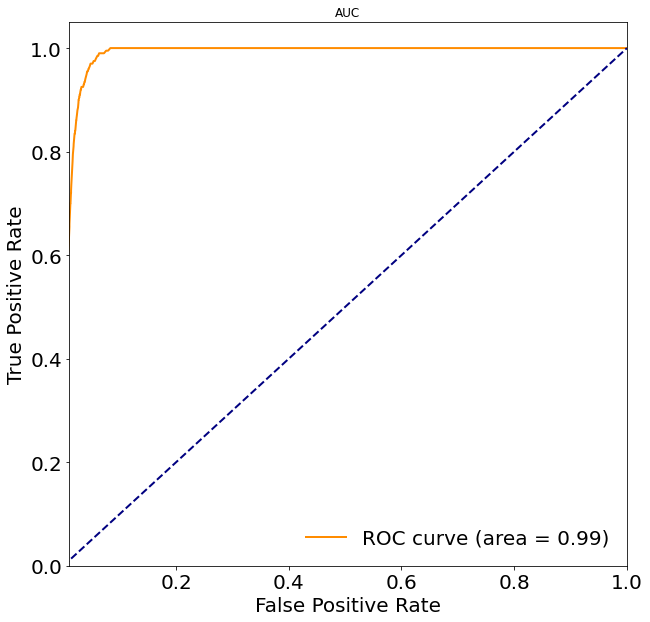

In [12]:
#画出ROC曲线 RandomForest train的AUC
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

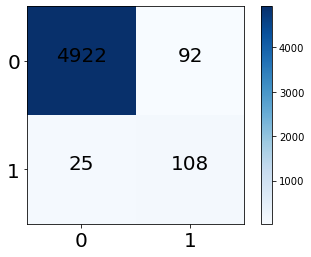

true: 5030


In [13]:
#画出混淆矩阵 RandomForest train 混淆矩阵
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [14]:
clf=ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

[0.         0.         0.         0.         0.         0.
 0.00162206 0.00405515 0.00973236 0.01459854 0.01703163 0.01946472
 0.02108678 0.02595296 0.02757502 0.03081914 0.0324412  0.03487429
 0.0405515  0.04298459 0.04379562 0.0486618  0.05109489 0.06082725
 1.        ]
[0.         0.2962963  0.33333333 0.38888889 0.40740741 0.44444444
 0.51851852 0.57407407 0.81481481 0.81481481 0.85185185 0.87037037
 0.87037037 0.90740741 0.92592593 0.96296296 0.96296296 0.96296296
 0.96296296 0.98148148 0.98148148 0.98148148 1.         1.
 1.        ]


<Figure size 432x288 with 0 Axes>

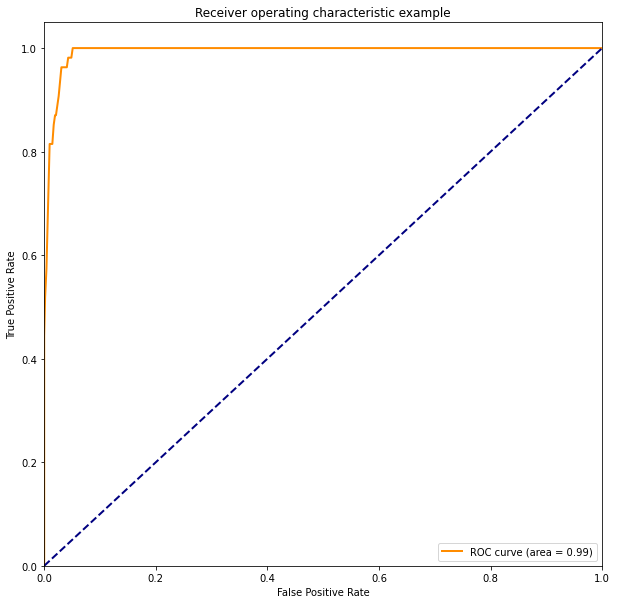

In [15]:
#画出ROC曲线 ExtraTrees test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

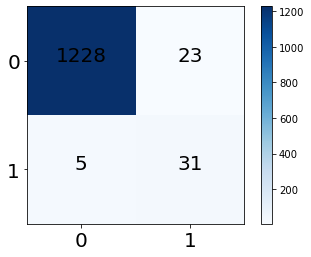

true: 1259


In [16]:
#画出混淆矩阵 ExtraTrees
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.00000000e+00 0.00000000e+00 2.02142713e-04 6.06428138e-04
 8.08570851e-04 1.81928441e-03 3.03214069e-03 4.24499697e-03
 1.21285628e-02 1.31392763e-02 1.43521326e-02 1.63735597e-02
 1.69799879e-02 2.04164140e-02 2.12249848e-02 2.38528401e-02
 2.74914089e-02 2.87042652e-02 3.39599757e-02 3.55771174e-02
 3.90135436e-02 4.20456843e-02 4.38649687e-02 4.70992521e-02
 4.89185365e-02 5.33656762e-02 5.72063877e-02 6.12492420e-02
 1.00000000e+00]
[0.    0.28  0.305 0.34  0.355 0.42  0.48  0.53  0.695 0.715 0.745 0.785
 0.8   0.84  0.85  0.88  0.91  0.915 0.935 0.945 0.96  0.965 0.97  0.98
 0.98  0.99  0.995 1.    1.   ]


<Figure size 432x288 with 0 Axes>

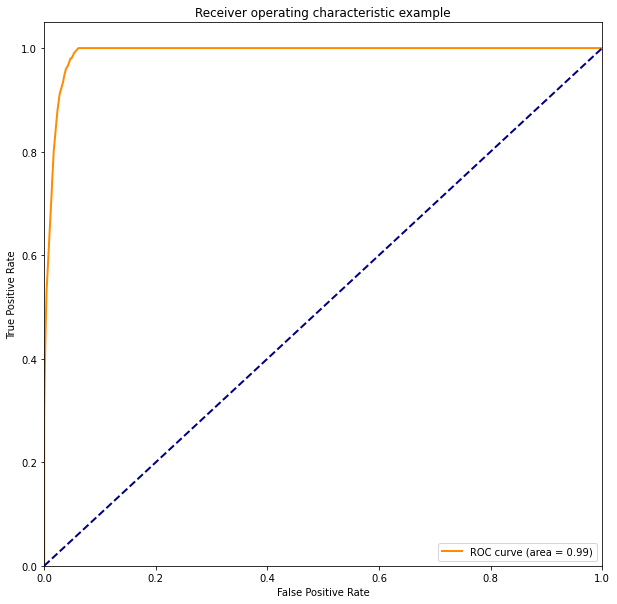

In [17]:
#画出ROC曲线 ExtraTrees train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

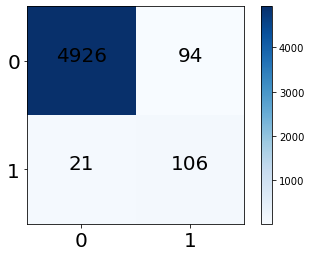

In [18]:
#画出混淆矩阵  ExtraTrees train
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()

In [19]:
clf =GaussianProcessClassifier()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.11030008e-04 8.11030008e-04 8.11030008e-04
 8.11030008e-04 8.11030008e-04 3.24412003e-03 4.05515004e-03
 4.05515004e-03 4.05515004e-03 8.92133009e-03 9.73236010e-03
 9.73236010e-03 1.05433901e-02 1.05433901e-02 1.21654501e-02
 1.37875101e-02 1.92214112e-01 1.95458232e-01 1.97080292e-01
 2.01135442e-01 2.02757502e-01 2.19789132e-01 2.21411192e-01
 2.23844282e-01 2.23844282e-01 2.27899432e-01 2.29521492e-01
 2.30332522e-01 2.33576642e-01 2.36009732e-01 2.39253852e-01
 2.41686942e-01 2.44120032e-01 2.50608273e-01 3.68207624e-01
 3.72262774e-01 3.73884834e-01 3.76317924e-01 3.77939984e-01
 3.79562044e-01 3.88483374e-01 3.90105434e-01 3.91727494e-01
 3.93349554e-01 3.98215734e-01 3.99837794e-01 4.00648824e-01
 4.01459854e-01 4.02270884e-01 4.03892944e-01 4.06326034e-01
 4.47688564e-01 4.49310624e-01 4.50932685e-01 4.53365775e-01
 4.53365775e-01 4.54987835e-01 4.58231955e-01 4.59854015e-01
 4.63909165e-01 5.458231

<Figure size 432x288 with 0 Axes>

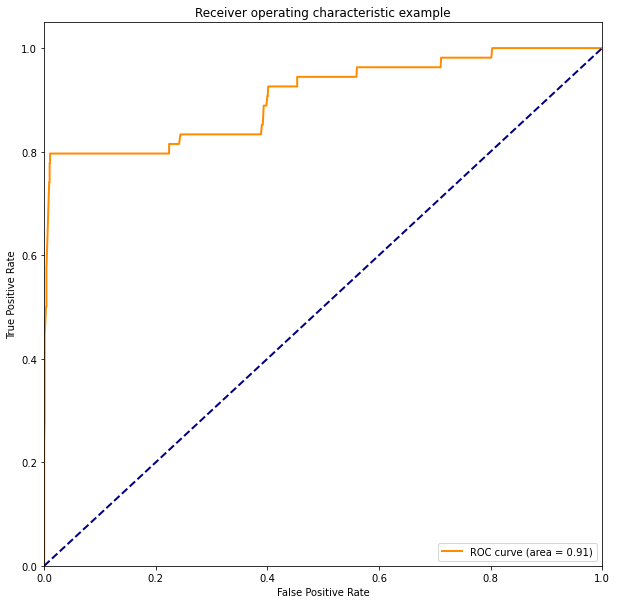

In [20]:
#画出ROC曲线 GaussianProcess test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

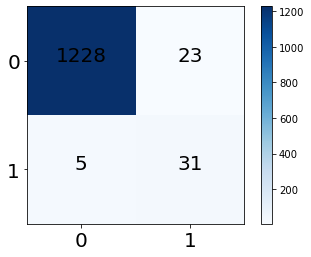

true: 1259


In [21]:
#画出混淆矩阵 GaussianProcess test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.00000000e+00 2.02142713e-04 2.02142713e-04 2.02142713e-04
 2.02142713e-04 4.04285426e-04 8.08570851e-04 1.01071356e-03
 1.01071356e-03 1.01071356e-03 1.41499899e-03 1.41499899e-03
 2.02142713e-03 2.22356984e-03 2.22356984e-03 2.22356984e-03
 2.22356984e-03 3.43642612e-03 3.84071154e-03 4.24499697e-03
 4.64928239e-03 4.85142511e-03 4.85142511e-03 5.25571053e-03
 5.25571053e-03 5.25571053e-03 1.11178492e-02 1.11178492e-02
 1.13199919e-02 1.15221346e-02 1.17242773e-02 1.17242773e-02
 1.27349909e-02 1.27349909e-02 1.31392763e-02 1.37457045e-02
 1.49585607e-02 1.53628462e-02 1.57671316e-02 1.63735597e-02
 1.73842733e-02 1.77885587e-02 1.83949869e-02 1.92035577e-02
 1.96078431e-02 1.69193451e-01 1.70204164e-01 1.70608450e-01
 1.72225591e-01 1.73034162e-01 1.74044876e-01 1.75257732e-01
 1.75662017e-01 1.76066303e-01 1.76672731e-01 1.77481302e-01
 1.77885587e-01 1.79300586e-01 1.79704872e-01 1.80311300e-01
 1.81524156e-01 1.84152011e-01 1.84758439e-01 1.85364868e-01
 1.86577724e-01 1.869820

<Figure size 432x288 with 0 Axes>

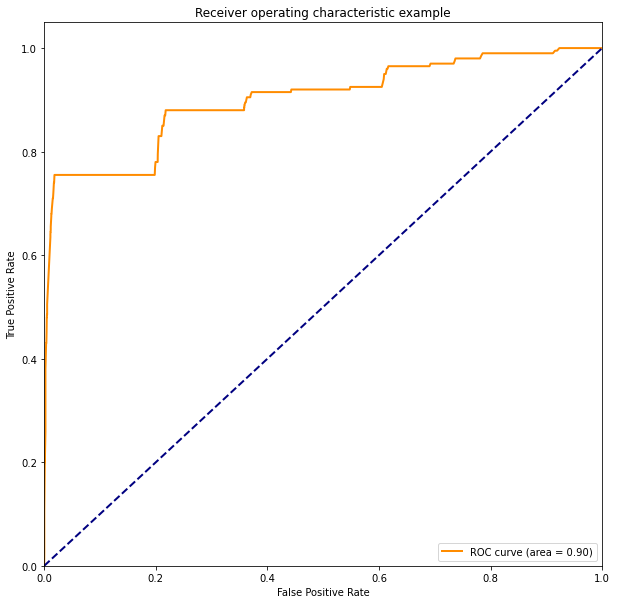

In [22]:
#画出ROC曲线 GaussianProcess train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [23]:
#画出混淆矩阵 GaussianProcess train
# clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

KeyboardInterrupt: 